In [71]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [72]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures_df = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures_df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [73]:
# Trim the dataset to begin on January 1st, 1990
yen_futures_df = yen_futures.loc["1990-01-01":, :]
yen_futures_df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged Return
Date,,,,,,,,,,
2014-02-28,9787.0,9848.0,9776.0,9825.0,27.0,9825.0,169374.0,200184.0,NaN,0.389344
2014-03-03,9840.0,9882.0,9840.0,9857.0,34.0,9859.0,149003.0,197621.0,0.346056,0.275566
2014-03-04,9859.0,9862.0,9776.0,9785.0,79.0,9780.0,137014.0,196097.0,-0.801298,0.346056
2014-03-06,9771.0,9773.0,9692.0,9705.0,69.0,9705.0,172188.0,199340.0,-0.766871,-0.801298
2014-03-07,9702.0,9724.0,9637.0,9681.0,24.0,9681.0,156252.0,201541.0,-0.247295,-0.766871


# Data Preparation

### Returns

In [74]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!
yen_futures_df["Return"] = yen_futures[["Settle"]].pct_change() * 100
yen_futures_df = yen_futures.replace(-np.inf, np.nan).dropna()
yen_futures_df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged Return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509,0.151335


### Lagged Returns 

In [75]:
# Create a lagged return using the shift function
# YOUR CODE HERE!
yen_futures_df["Lagged Return"] = yen_futures["Return"].shift()
yen_futures_df = yen_futures.dropna()
yen_futures_df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged Return
Date,,,,,,,,,,
2014-03-03,9840.0,9882.0,9840.0,9857.0,34.0,9859.0,149003.0,197621.0,0.346056,0.275566
2014-03-04,9859.0,9862.0,9776.0,9785.0,79.0,9780.0,137014.0,196097.0,-0.801298,0.346056
2014-03-06,9771.0,9773.0,9692.0,9705.0,69.0,9705.0,172188.0,199340.0,-0.766871,-0.801298
2014-03-07,9702.0,9724.0,9637.0,9681.0,24.0,9681.0,156252.0,201541.0,-0.247295,-0.766871
2014-03-10,9694.0,9714.0,9671.0,9691.0,10.0,9691.0,117210.0,195505.0,0.103295,-0.247295


### Train Test Split

In [45]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures_df[:'2018']
test = yen_futures_df['2018':]

In [46]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!
X_train = train["Lagged Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged Return"].to_frame()
y_test = test["Return"]

In [47]:
X_train.tail()

,Lagged Return
Date,
2018-12-24,-0.187545
2018-12-26,0.834485
2018-12-27,-0.893346
2018-12-28,0.464525
2018-12-31,0.297242


# Linear Regression Model

In [48]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
# YOUR CODE HERE!
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [49]:
# Make a prediction of "y" values using just the test dataset
# YOUR CODE HERE
predictions = model.predict(X_test)

In [51]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# YOUR CODE HERE!
Results = y_test.to_frame()
Results["Predicted Return"] = predictions


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E93ABD6208>,
      dtype=object)

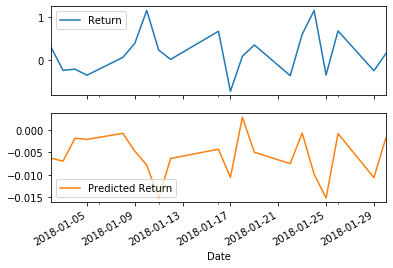

In [58]:
# Plot the first 20 predictions vs the true values
# YOUR CODE HERE!
Results[:20].plot(subplots=True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [63]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# YOUR CODE HERE!
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)
    
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!
rmse = np.sqrt(mse)
print(f"OUT-OF-SAMPLE ROOT MEAN SQUARED ERROR (RMSE): {rmse}")

OUT-OF-SAMPLE ROOT MEAN SQUARED ERROR (RMSE): 0.41523458445881456


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [70]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-Sample Root Mean Square Error (RMSE): {in_sample_rmse}")

In-Sample Root Mean Square Error (RMSE): 0.5673974709013848


# Conclusions

The model did better with the data it didn't see before versus the data it saw before based on the root mean squared error of 0.567% on in-sample data and a root mean squared error of 0.412% on out-of-sample data.